In [1]:
#Se importan las librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
#Se hacen Nan los datos nulos
sentinels = {'Precipitación': ['Nulo'],'Evaporación':['Nulo'],'TMáx':['Nulo'],'TMín':['Nulo']}

In [3]:
#Se lee la tabla.
df0 = pd.read_csv('Alamos.txt', skiprows = 20, sep='\s+', header = None, names = ["Día/Mes/Año", "Precipitación", "Evaporación", "TMáx", "TMín"], na_values=sentinels)
sns.set(rc={'figure.figsize':(12,8.27)})

In [4]:
#Se cambia las fechas a variable temporal.
df0['Fecha'] = pd.to_datetime(df0.apply(lambda x: x['Día/Mes/Año'], 1),dayfirst =True)

In [5]:
#Se elimina la primera columna.
df0 = df0.drop(['Día/Mes/Año'],axis = 1)

In [6]:
#Se crearán columnas para los meses y años.
df0['Mes'] = df0['Fecha'].dt.month
df0['Año'] = df0['Fecha'].dt.year
df0.head()

,Precipitación,Evaporación,TMáx,TMín,Fecha,Mes,Año
0,0.0,2.0,22.5,6.0,1961-01-01,1,1961
1,0.0,1.1,25.0,9.0,1961-01-02,1,1961
2,0.0,3.4,27.5,9.0,1961-01-03,1,1961
3,0.0,2.4,27.5,11.0,1961-01-04,1,1961
4,7.4,6.0,22.0,13.5,1961-01-05,1,1961


In [7]:
#Se checan los tipos de datos.
df0.dtypes

Precipitación           float64
Evaporación             float64
TMáx                    float64
TMín                    float64
Fecha            datetime64[ns]
Mes                       int64
Año                       int64
dtype: object

In [8]:
#Se hacen los promedios mensuales solicitados.
inicio = 1
Meses = [inicio + i for i in range(0, 12)]
PrecipMesProm = [df0[df0.Mes==(inicio + i)].Precipitación.mean() for i in range (0,12)]
TMáxMesProm = [df0[df0.Mes==(inicio + i)].TMáx.mean() for i in range (0,12)]
TMínMesProm = [df0[df0.Mes==(inicio + i)].TMín.mean() for i in range (0,12)]

In [9]:
#Se hace el dataframe de los promedios mensuales.
datos_mensuales = {'Mes': Meses, 'Promedio de precipitación': PrecipMesProm, 'Temperatura máxima promedio': TMáxMesProm, 'Temperatura mínima promedio': TMínMesProm}
df0_mensual = pd.DataFrame(data=datos_mensuales)
df0_mensual

,Mes,Promedio de precipitación,Temperatura máxima promedio,Temperatura mínima promedio
0,1,1.130154,27.822581,9.168680
1,2,0.635340,28.796923,9.493077
2,3,0.569331,30.206395,10.207547
3,4,0.061852,32.481162,11.641915
4,5,0.124825,35.243338,14.072230
5,6,0.850363,38.000000,18.213663
6,7,5.946774,36.197947,19.786490
7,8,6.402949,35.142076,20.054418
8,9,2.888646,35.168841,18.433768
9,10,1.714223,34.447654,15.189150


In [10]:
#Se hacen los promedios anuales solicitados.
inicio = 1961
Años = [inicio + i for i in range(0, 24)]
PrecipAnualAcum = [df0[df0.Año==(inicio + i)].Precipitación.sum() for i in range (0,24)]
TMáxAnualProm = [df0[df0.Año==(inicio + i)].TMáx.mean() for i in range (0,24)]
TMínAnualProm = [df0[df0.Año==(inicio + i)].TMín.mean() for i in range (0,24)]

In [11]:
#Se hace el dataframe de los promedios anuales. 
datos_anuales = {'Año': Años, 'Precipitación acumulada promedio': PrecipAnualAcum, 'Temperatura máxima promedio': TMáxAnualProm, 'Temperatura mínima promedio': TMínAnualProm}
df0_anual = pd.DataFrame(data=datos_anuales)
df0_anual

,Año,Precipitación acumulada promedio,Temperatura máxima promedio,Temperatura mínima promedio
0,1961,727.2,31.674451,15.486188
1,1962,599.3,32.785075,15.750746
2,1963,668.4,33.463014,15.935890
3,1964,509.3,32.295082,14.905738
4,1965,765.0,31.698630,14.493132
5,1966,0.0,NaN,NaN
6,1967,608.1,32.398630,14.893151
7,1968,835.4,31.275956,15.271858
8,1969,646.6,33.255495,15.965753
9,1970,520.8,32.617978,15.134831


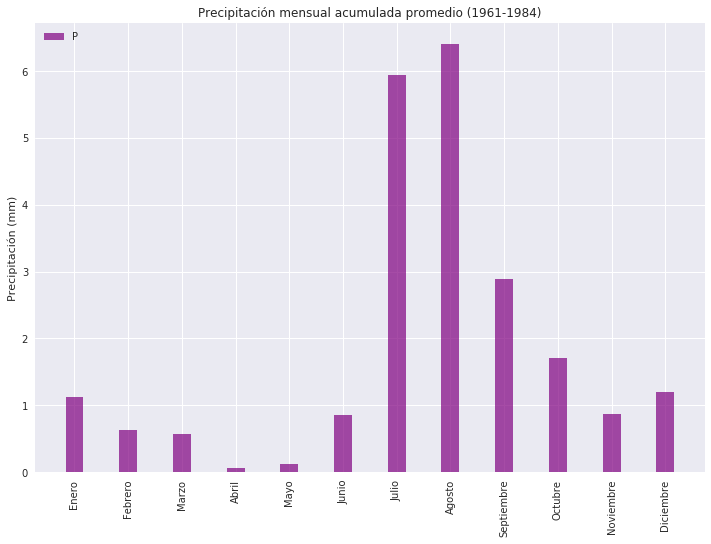

In [12]:
#Se grafica la precipitación mensual acumulada promedio.
DesMois = ('Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre')
fecha = Meses
PRECIPMENSUAL = PrecipMesProm

#Calculando anchura óptima
width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPMENSUAL,width,align='center', alpha=0.7, color = 'purple')
plt.xticks(fecha-width, DesMois, size = 'small', rotation = 90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación mensual acumulada promedio (1961-1984)')
plt.gca().legend(('PMENSUAL'),frameon=False,loc='upper left')
plt.savefig('precipromensual',plt=2000)
plt.show()

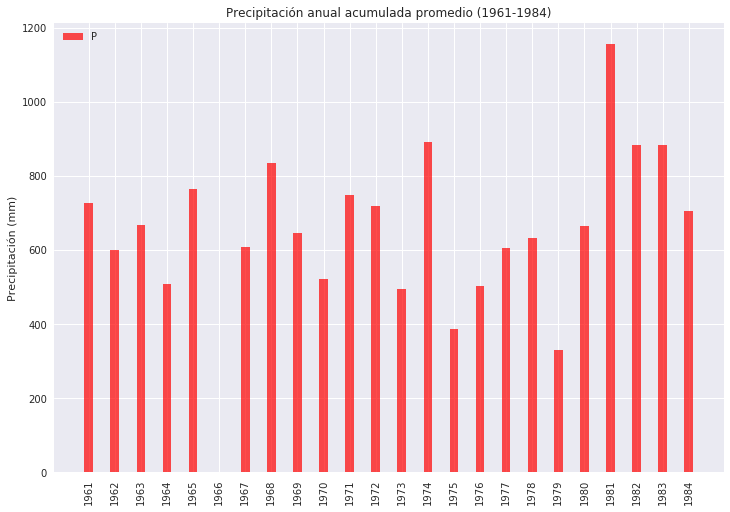

In [13]:
fecha = Años
PRECIPANUAL = PrecipAnualAcum

width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPANUAL,width,align='center', alpha=0.7, color = 'red')
plt.xticks(fecha-width, Años, size = 'small', rotation = 90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación anual acumulada promedio (1961-1984)')
plt.gca().legend(('PMANUAL'),frameon=False,loc='upper left')
plt.savefig('precipromanual',plt=2000)
plt.show()

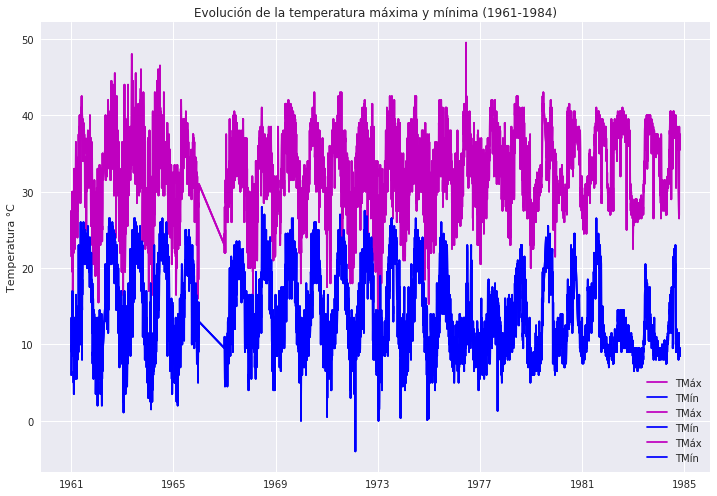

In [16]:
#Ahora se proceden a graficar las temperaturas máximas y mínimas a través de los años.
plt.plot_date(x=df0.Fecha, y=df0.TMáx, fmt= "m")
plt.plot_date(x=df0.Fecha, y=df0.TMín, fmt= "b-")
plt.legend(loc='best')
plt.title("Evolución de la temperatura máxima y mínima (1961-1984)")
plt.ylabel("Temperatura °C")
plt.grid(True)
plt.savefig('TMaxMinEvo', plt = 2000)
plt.show()

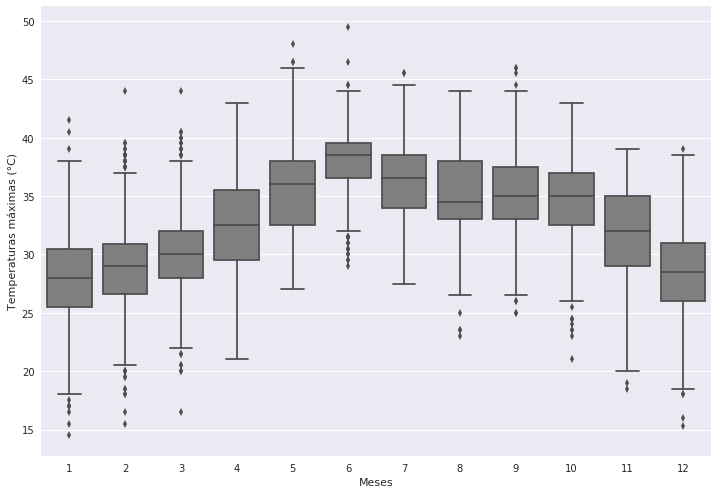

In [17]:
#Se hace la gráfica de cajas de la temperatura máxima promedio mensual.
DesMois = ('Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre') 
ax = sns.boxplot(x="Mes", y="TMáx", data=df0, color = 'gray')
ax.set(xlabel='Meses', ylabel='Temperaturas máximas (°C)')
sns.despine()
plt.savefig('CajaTMaxMensual',plt=2000)
plt.show()

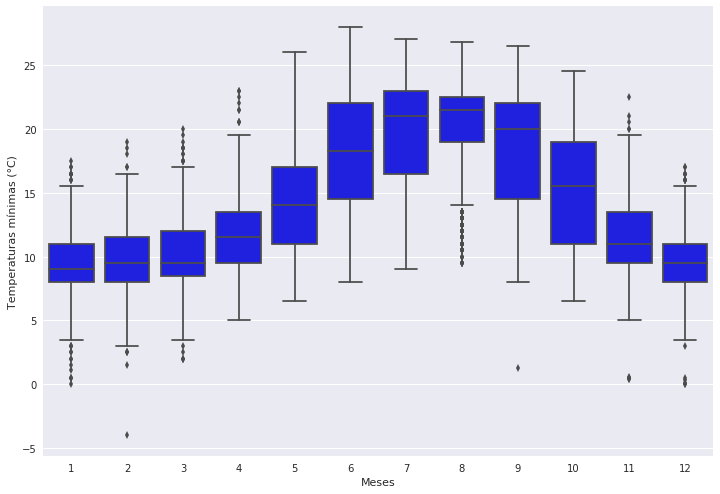

In [18]:
#Se hace la gráfica de cajas de la temperatura mínima promedio mensual.
DesMois = ('Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre') 
ax = sns.boxplot(x="Mes", y="TMín", data=df0, color = 'blue')
ax.set(xlabel='Meses', ylabel='Temperaturas mínimas (°C)')
sns.despine()
plt.savefig('CajaTMinMensual',plt=2000)
plt.show()

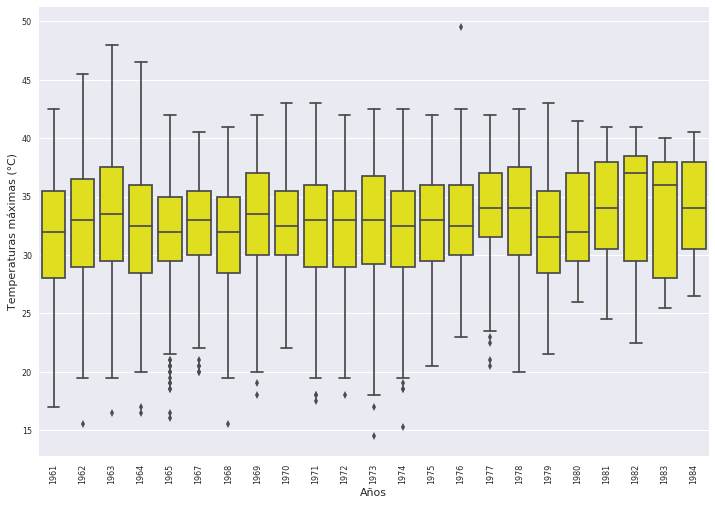

In [19]:
#Se hace la gráfica de cajas de la temperatura máxima promedio anual.
ax = sns.boxplot(x="Año", y="TMáx", data=df0, color = "yellow")
ax.set(xlabel='Años', ylabel='Temperaturas máximas (°C)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) 
ax.tick_params(labelsize=8) 
sns.despine()
plt.savefig('CajaTMaxAnual',plt=2000)
plt.show()

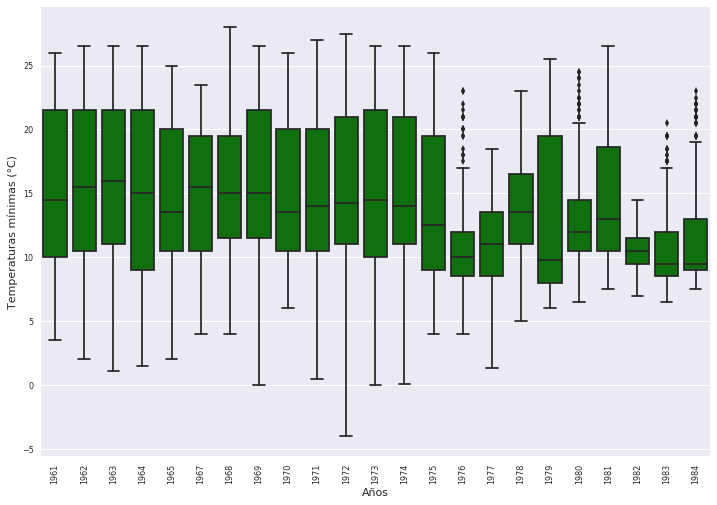

In [20]:
#Se hace la gráfica de cajas de la temperatura mínima promedio anual.
ax = sns.boxplot(x="Año", y="TMín", data=df0, color = "green")
ax.set(xlabel='Años', ylabel='Temperaturas mínimas (°C)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) 
ax.tick_params(labelsize=8) 
sns.despine()
plt.savefig('CajaTMinAnual',plt=2000)
plt.show()